In [1]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt  # Python standard library datetime  module
import math as math
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [4]:
url='http://opendap.renci.org:1935/thredds/dodsC/oedata/SSH.1440x720.20140917.nc'
var_name='SSH'
print "Plotting %s from %s" % (var_name, url)

nc=netCDF4.Dataset(url)
print 'Available variables are: ' +  str(nc.variables.keys())

Plotting SSH from http://opendap.renci.org:1935/thredds/dodsC/oedata/SSH.1440x720.20140917.nc
Available variables are: [u'TIME', u'LATITUDE_T', u'LONGITUDE_T', u'SSH']


In [5]:
# get needed variables from nc file
lon=nc.variables['LONGITUDE_T'][:]
lat=nc.variables['LATITUDE_T'][:]
latmin = np.mean(lat)

# make a date string for the title 
Time=nc.variables['TIME']
dtime = netCDF4.num2date(Time[0],Time.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')
print daystr

# create grid for plotting
lons,lats = np.meshgrid(lon,lat)

2014-Sep-17 12:00


In [6]:
var=nc.variables[var_name]
#print var.data
sshd=var[0,:,:]
vmin=sshd.min()
vmax=sshd.max()
# This min/max calc won't work in general, but is OK for data relatively well distributed about 0
vminmax=math.ceil(2*max(abs(vmin),abs(vmax)))/2

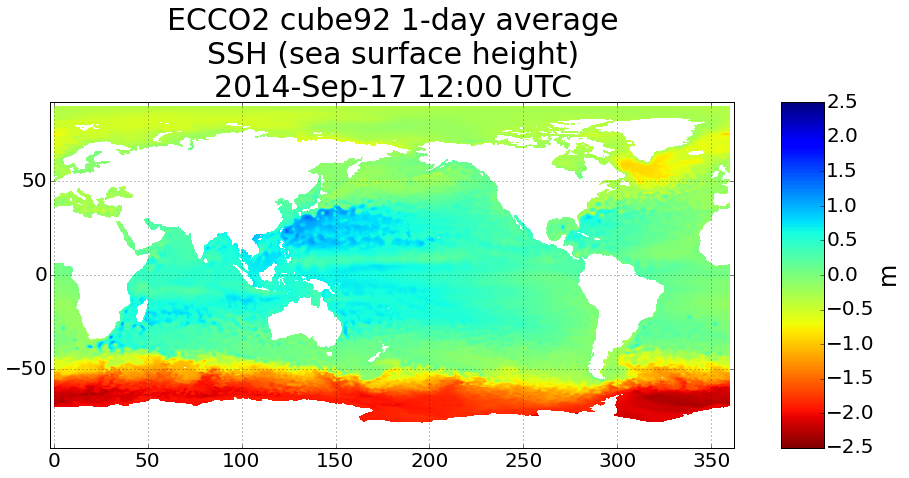

In [11]:
fig = plt.figure(figsize=(12,6), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(latmin * np.pi / 180.0))

pc=plt.pcolormesh(lons, lats, sshd, cmap=plt.cm.jet_r, vmin=-vminmax, vmax=vminmax)
plt.title("%s\n%s (%s)\n%s UTC" % (nc.description, var_name, var.long_name, daystr), fontsize=30)
plt.grid(True)
plt.xlim((-2,362))
plt.ylim((-92,92))
plt.tick_params(axis='both', which='major', labelsize=20)

# add colorbar
cbax = fig.add_axes([0.95, 0.1, 0.05, 0.8]) 
cb = plt.colorbar(pc, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=20)


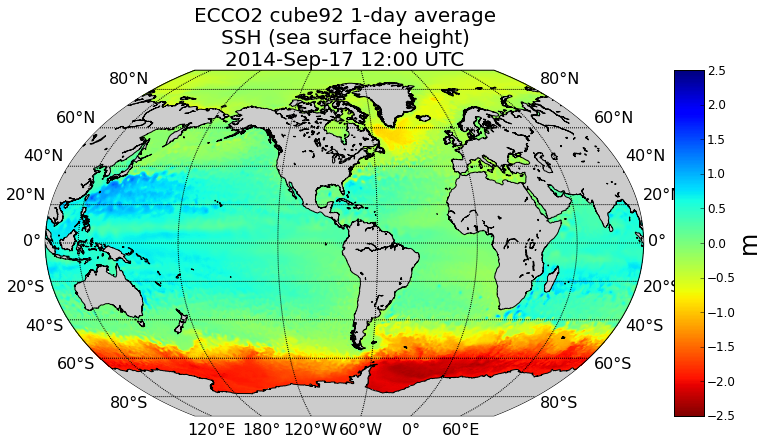

In [13]:
# Let's redraw the figure as a map with Basemap...

fig = plt.figure(figsize=(12,6), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
m = Basemap(projection='kav7',lon_0=-80,resolution='l')
#m=Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
#m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0],fontsize=16)
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1],fontsize=16)
pc=m.pcolormesh(lons, lats, sshd, cmap=plt.cm.jet_r, vmin=-vminmax, vmax=vminmax, latlon=True)
cb = m.colorbar(pc,"right", size="5%", pad="5%")
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title("%s\n%s (%s)\n%s UTC" % (nc.description, var_name, var.long_name, daystr), fontsize=20)